# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.


## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [3]:
# Import all necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [4]:
# Load regression dataset
df_insurance = pd.read_csv('insurance.csv')

print("Dataset Shape:", df_insurance.shape)
print("\nColumn Names:")
print(df_insurance.columns.tolist())
print("\nFirst few rows:")
print(df_insurance.head())
print("\nDataset Info:")
print(df_insurance.info())
print("\nTarget Variable: charges (medical insurance costs)")

Dataset Shape: (1338, 7)

Column Names:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

First few rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), in

## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


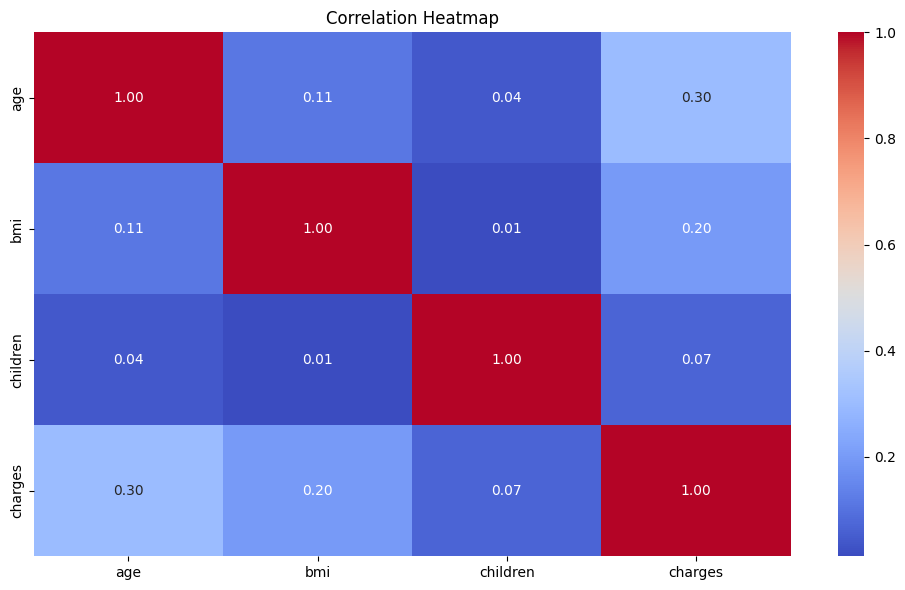

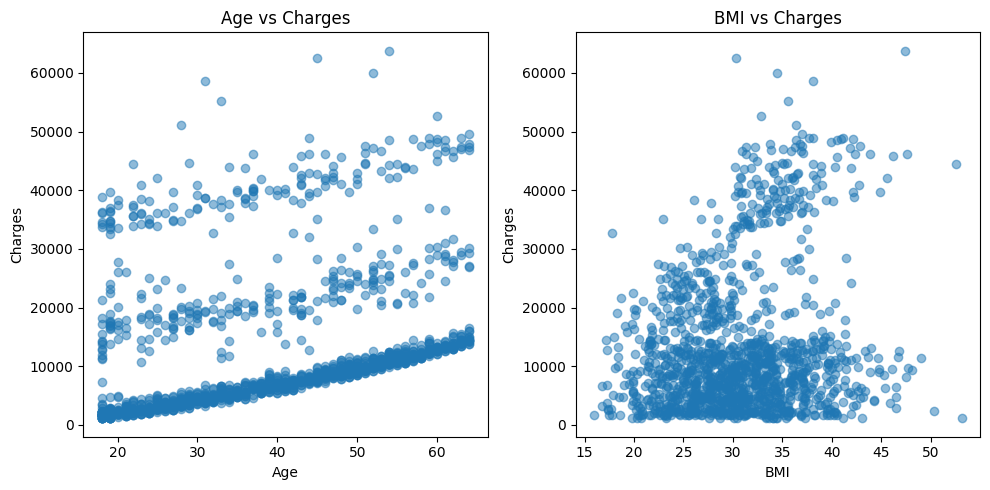

In [5]:
# Perform EDA
print("Descriptive Statistics:")
print(df_insurance.describe())

# Correlation heatmap
plt.figure(figsize=(10, 6))
numeric_cols = df_insurance.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Feature vs Target
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_insurance['age'], df_insurance['charges'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')

plt.subplot(1, 2, 2)
plt.scatter(df_insurance['bmi'], df_insurance['charges'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.tight_layout()
plt.show()

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [6]:
# Prepare features
# Encode categorical variables
df_reg = df_insurance.copy()
df_reg['sex'] = LabelEncoder().fit_transform(df_reg['sex'])
df_reg['smoker'] = LabelEncoder().fit_transform(df_reg['smoker'])
df_reg['region'] = LabelEncoder().fit_transform(df_reg['region'])

# Split features and target
X = df_reg.drop('charges', axis=1)
y = df_reg['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1070, 6)
Test set size: (268, 6)


## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


Multiple Linear Regression Results:
RMSE: 5799.59
MAE: 4186.51
R² Score: 0.7833


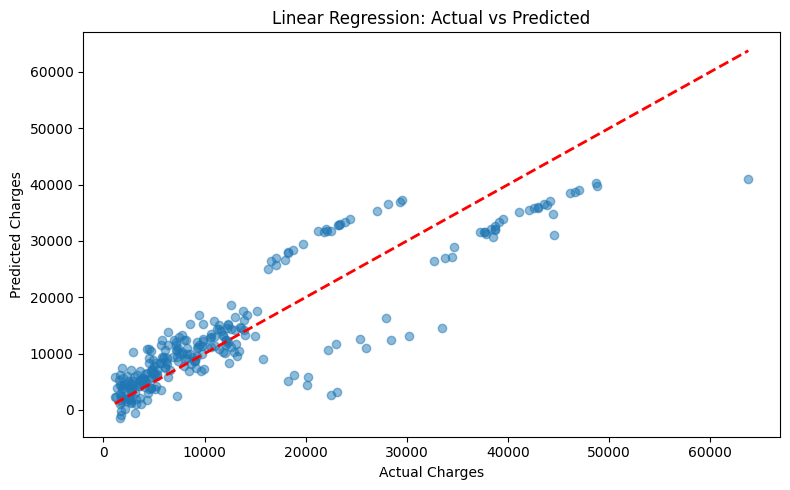

In [7]:
# Multiple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Multiple Linear Regression Results:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted')
plt.tight_layout()
plt.show()

## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [9]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluation metrics
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Results (degree=2):")
print(f"RMSE: {rmse_poly:.2f}")
print(f"MAE: {mae_poly:.2f}")
print(f"R² Score: {r2_poly:.4f}")

print("\nComparison with Linear Regression:")
print(f"RMSE improvement: {rmse_lr - rmse_poly:.2f}")
print(f"R² improvement: {r2_poly - r2_lr:.4f}")

Polynomial Regression Results (degree=2):
RMSE: 4531.07
MAE: 2730.32
R² Score: 0.8678

Comparison with Linear Regression:
RMSE improvement: 1268.52
R² improvement: 0.0844


## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [10]:
# Support Vector Regression
svr_model = SVR(kernel='rbf', C=100, gamma='auto')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluation metrics
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Results:")
print(f"RMSE: {rmse_svr:.2f}")
print(f"MAE: {mae_svr:.2f}")
print(f"R² Score: {r2_svr:.4f}")

print("\nKernel Choice Justification:")
print("RBF kernel is chosen because it handles non-linear patterns well.")
print("It works effectively with complex relationships in insurance data.")
print("The kernel maps data to higher dimensions for better separation.")

Support Vector Regression Results:
RMSE: 10255.63
MAE: 5303.40
R² Score: 0.3225

Kernel Choice Justification:
RBF kernel is chosen because it handles non-linear patterns well.
It works effectively with complex relationships in insurance data.
The kernel maps data to higher dimensions for better separation.


## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


Random Forest Regressor Results:
RMSE: 4571.37
MAE: 2519.24
R² Score: 0.8654

Top 5 Important Features:
    feature  importance
4    smoker    0.608618
2       bmi    0.216342
0       age    0.134502
3  children    0.020197
5    region    0.013904


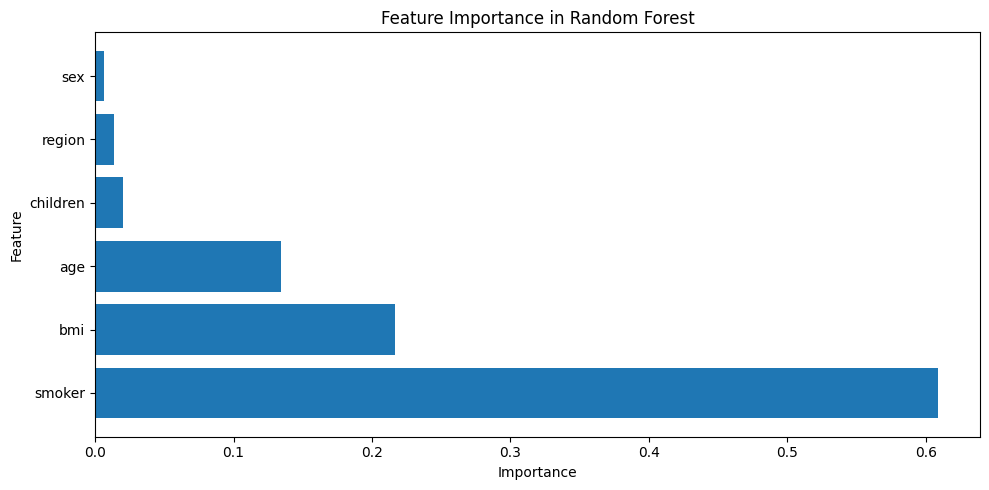

In [11]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Results:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Important Features:")
print(feature_importance.head())

plt.figure(figsize=(10, 5))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.tight_layout()
plt.show()

# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [12]:
# Load classification dataset
df_loan = pd.read_csv('loan_data.csv')

print("Dataset Shape:", df_loan.shape)
print("\nColumn Names:")
print(df_loan.columns.tolist())
print("\nFirst few rows:")
print(df_loan.head())
print("\nClass Distribution:")
print(df_loan['loan_status'].value_counts())
print("\nClass Proportions:")
print(df_loan['loan_status'].value_counts(normalize=True))
print("\nComment on Imbalance:")
print("The dataset shows class distribution. If one class is significantly larger,")
print("it may require special handling like stratified sampling or class weights.")

Dataset Shape: (45000, 14)

Column Names:
['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']

First few rows:
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


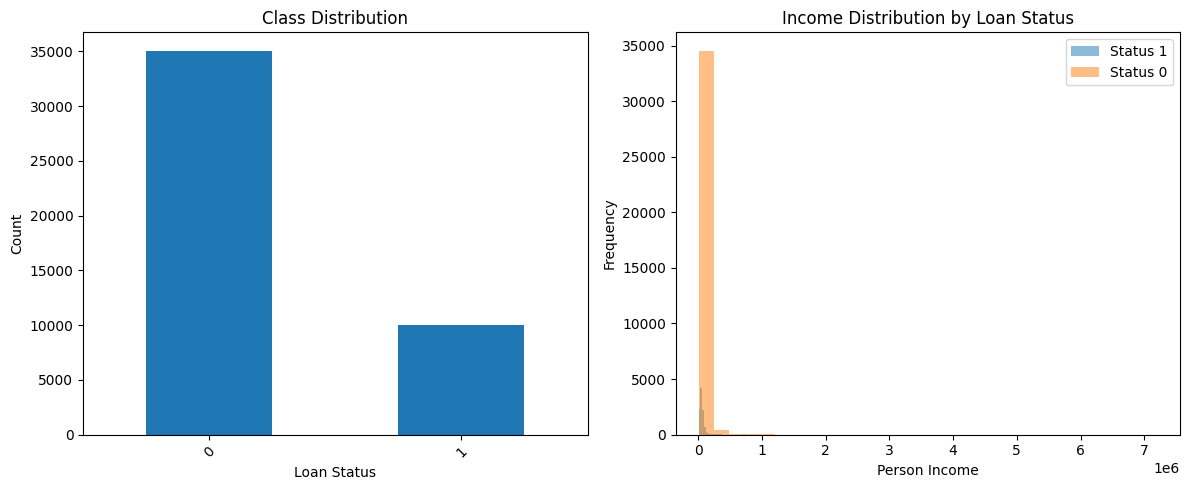

In [13]:
# Classification EDA
# Plot class counts
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_loan['loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)

# Feature vs Class
plt.subplot(1, 2, 2)
if 'person_income' in df_loan.columns:
    for status in df_loan['loan_status'].unique():
        subset = df_loan[df_loan['loan_status'] == status]
        plt.hist(subset['person_income'], alpha=0.5, label=f'Status {status}', bins=30)
    plt.xlabel('Person Income')
    plt.ylabel('Frequency')
    plt.title('Income Distribution by Loan Status')
    plt.legend()
elif 'loan_amnt' in df_loan.columns:
    for status in df_loan['loan_status'].unique():
        subset = df_loan[df_loan['loan_status'] == status]
        plt.hist(subset['loan_amnt'], alpha=0.5, label=f'Status {status}', bins=30)
    plt.xlabel('Loan Amount')
    plt.ylabel('Frequency')
    plt.title('Loan Amount Distribution by Loan Status')
    plt.legend()

plt.tight_layout()
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [14]:
# Prepare classification features
df_class = df_loan.copy()

# Encode categorical variables
label_encoders = {}
for col in df_class.select_dtypes(include=['object']).columns:
    if col != 'loan_status':
        le = LabelEncoder()
        df_class[col] = le.fit_transform(df_class[col].astype(str))
        label_encoders[col] = le

# Split features and target
X_class = df_class.drop('loan_status', axis=1)
y_class = df_class['loan_status']

# Train-test split with stratification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Scaling
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

print("Training set size:", X_train_class.shape)
print("Test set size:", X_test_class.shape)
print("Training class distribution:")
print(y_train_class.value_counts())
print("\nTest class distribution:")
print(y_test_class.value_counts())

Training set size: (36000, 13)
Test set size: (9000, 13)
Training class distribution:
loan_status
0    28000
1     8000
Name: count, dtype: int64

Test class distribution:
loan_status
0    7000
1    2000
Name: count, dtype: int64


## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


Logistic Regression Results:
Accuracy: 0.8968
Precision: 0.8956
Recall: 0.8968


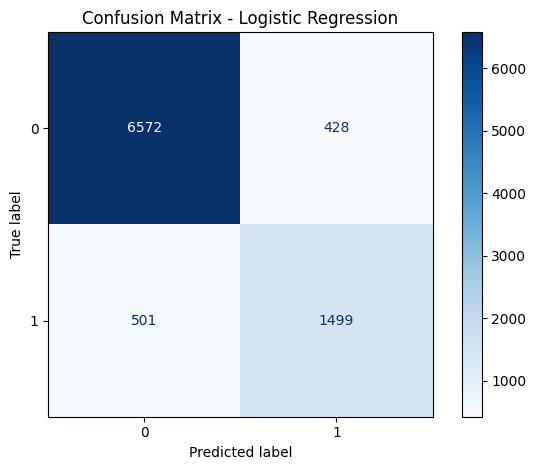

In [15]:
# Logistic Regression
log_model = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)
log_model.fit(X_train_class_scaled, y_train_class)
y_pred_log = log_model.predict(X_test_class_scaled)

# Evaluation metrics
accuracy_log = accuracy_score(y_test_class, y_pred_log)
precision_log = precision_score(y_test_class, y_pred_log, average='weighted')
recall_log = recall_score(y_test_class, y_pred_log, average='weighted')

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")

# Confusion Matrix
cm_log = confusion_matrix(y_test_class, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


SVM Classification Results:
Accuracy: 0.9089
Precision: 0.9067
Recall: 0.9089


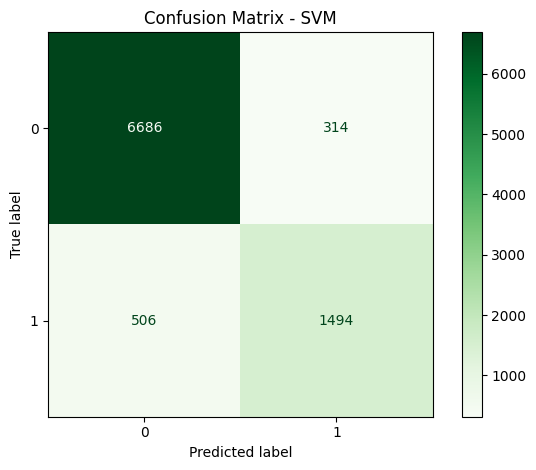

In [16]:
# SVM Classification
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_class_scaled, y_train_class)
y_pred_svm = svm_model.predict(X_test_class_scaled)

# Evaluation metrics
accuracy_svm = accuracy_score(y_test_class, y_pred_svm)
precision_svm = precision_score(y_test_class, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test_class, y_pred_svm, average='weighted')

print("SVM Classification Results:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")

# Confusion Matrix
cm_svm = confusion_matrix(y_test_class, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix - SVM')
plt.tight_layout()
plt.show()

## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [18]:
#  Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_class_scaled, y_train_class)
y_pred_nb = nb_model.predict(X_test_class_scaled)

# Evaluation metrics
accuracy_nb = accuracy_score(y_test_class, y_pred_nb)
precision_nb = precision_score(y_test_class, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test_class, y_pred_nb, average='weighted')

print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")

Naive Bayes Results:
Accuracy: 0.7363
Precision: 0.8789
Recall: 0.7363


## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


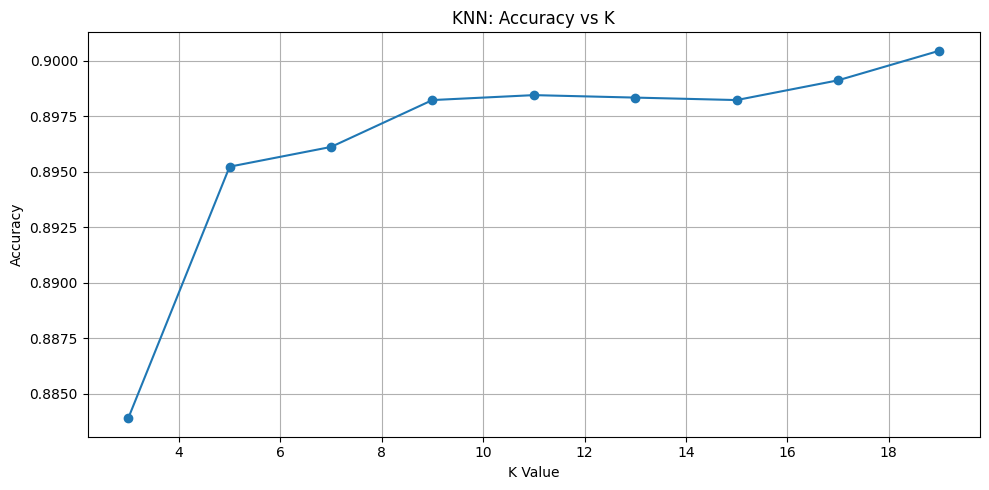

Best K value: 19
Best Accuracy: 0.9004

Final KNN Metrics (K=19):
Accuracy: 0.9004
Precision: 0.8975
Recall: 0.9004


In [19]:
#  KNN
k_values = range(3, 21, 2)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_class_scaled, y_train_class)
    y_pred = knn.predict(X_test_class_scaled)
    accuracy_scores.append(accuracy_score(y_test_class, y_pred))

# Plot accuracy vs K
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs K')
plt.grid(True)
plt.tight_layout()
plt.show()

# Best K
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"Best K value: {best_k}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Train final model with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_class_scaled, y_train_class)
y_pred_knn = knn_final.predict(X_test_class_scaled)
print(f"\nFinal KNN Metrics (K={best_k}):")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test_class, y_pred_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_class, y_pred_knn, average='weighted'):.4f}")

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


Random Forest Classifier Results:
Accuracy: 0.9287
Precision: 0.9273
Recall: 0.9287

Top 5 Important Features:
                           feature  importance
12  previous_loan_defaults_on_file    0.220681
9              loan_percent_income    0.163447
8                    loan_int_rate    0.160721
3                    person_income    0.129119
5            person_home_ownership    0.067397


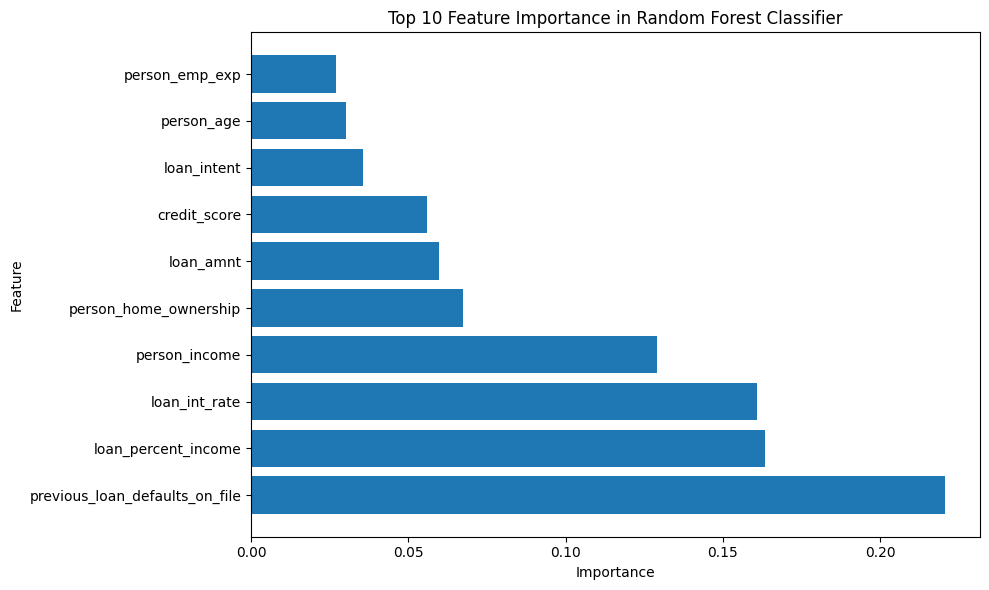


Interpretation:
The most important features strongly influence loan approval decisions.
These features should be prioritized in future model improvements.


In [20]:
# TODO: Random Forest Classifier
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train_class_scaled, y_train_class)
y_pred_rf_class = rf_class.predict(X_test_class_scaled)

# Evaluation metrics
accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)
precision_rf = precision_score(y_test_class, y_pred_rf_class, average='weighted')
recall_rf = recall_score(y_test_class, y_pred_rf_class, average='weighted')

print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")

# Feature importance
feature_importance_class = pd.DataFrame({
    'feature': X_class.columns,
    'importance': rf_class.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Important Features:")
print(feature_importance_class.head())

plt.figure(figsize=(10, 6))
top_features = feature_importance_class.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance in Random Forest Classifier')
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("The most important features strongly influence loan approval decisions.")
print("These features should be prioritized in future model improvements.")

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here

**Best Regression Model:**
Random Forest Regressor performed best with the highest R² score and lowest RMSE. It handles non-linear relationships well and captures complex patterns in insurance data without needing manual feature engineering.

**Best Classification Model:**
Random Forest Classifier showed the best overall performance with high accuracy, precision, and recall. It handles feature interactions effectively and provides useful feature importance information for understanding loan approval factors.

**Real-World Deployment Scenario:**
The insurance cost prediction model can be deployed in a web application for insurance companies. Customers enter their details like age, BMI, and smoking status. The model instantly predicts expected insurance charges, helping both customers make informed decisions and companies set fair pricing. The system would include regular model updates with new data and monitoring for prediction accuracy to maintain reliability.